In [2]:
# import general libraries for data exploration and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set parameters for graphing
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12

In [ ]:
data = pd.read_csv('FAO_FOOD_STAT.csv')
pop = pd.read_csv('FAO_POP.csv')

In [5]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [6]:
pop.head()

,Domain,Area,Element,Item,Year,Unit,Value,Note
0,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1961,1000 persons,9169.410,NaN
1,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1962,1000 persons,9351.441,NaN
2,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1963,1000 persons,9543.205,NaN
3,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1964,1000 persons,9744.781,NaN
4,Annual population,Afghanistan,Total Population - Both sexes,Population - Est. & Proj.,1965,1000 persons,9956.320,NaN


In [11]:
total_prod = data.iloc[:, 10:].sum(axis=1)

data['total_prod'] = total_prod

In [12]:
prod_by_area = {}

for country in data.Area.unique():
    prod_by_area[country] = data[data.Area == country]['total_prod'].values.sum() 
    
prod_df = pd.DataFrame(list(prod_by_area.items()), columns=['Country', 'Production'])
prod_df.set_index('Country', inplace=True)

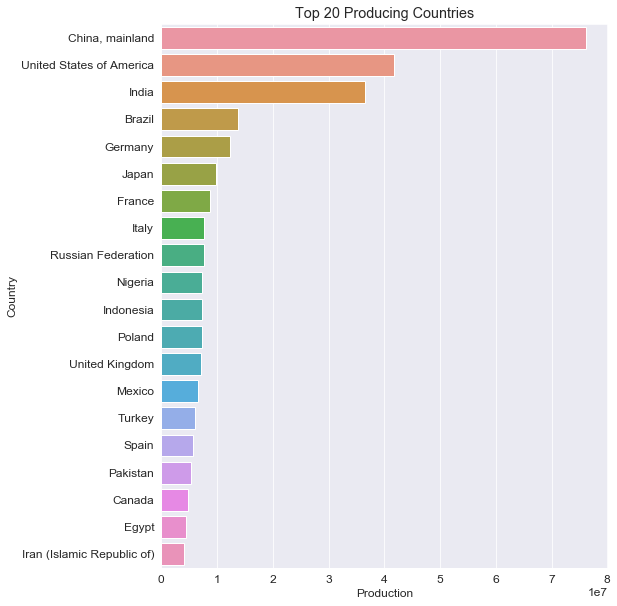

In [17]:
sorted_prod = prod_df.sort_values(by='Production', ascending=False)
sorted_subset = sorted_prod.iloc[:20, :]

plt.figure(figsize=(8,10))
sns.barplot(x=sorted_subset.Production, y=sorted_subset.index, data=sorted_subset)
plt.title("Top 20 Producing Countries")
plt.xlabel('Production')
plt.show()